# Introdução à Aprendizagem por Reforço

Esta é uma aula introdutória aos conceitos fundamentais à Aprendizagem por Reforço (Reinforcement learning).

[Prof. Raphael](https://www.linkedin.com/in/raphaelgarciamoreira/)

### Primeiras façanhas com aplicações interessantes

[Stanford Autonomous Helicopter - Airshow #1 - Julho de 2008](https://youtu.be/0JL04JJjocc?si=ir2LsV-UtxglpOO4)

[Autonomous Helicopters Teach Themselves to Fly Stunts, Andrew NG, Stanford - Agosto de 2008](https://youtu.be/M-QUkgk3HyE?si=NSPWKcSDqY8d2MFt)

[New dog-like robot from Boston Dynamics can open doors, Guardian News - Fevereiro de 2018](https://youtu.be/wXxrmussq4E?si=0ZqsxthSEhh34Hp5)

### NASA Subsonic Single Aft Engine (SUSAN) Electrofan Aircraft Concept
[Assista ao vídeo: Conceito de aeronave ventilador elétrico/turbina elétrica com motor subsônico de popa único](https://youtu.be/RaEzL4VvfTA?si=rfTXgjfnMdsx6hrI)


SUSAN refere-se a um conceito avançado de aeronave híbrida-elétrica projetada para reduzir os níveis de emissão e melhorar a eficiência de combustível em aeronaves da categoria de transporte. A configuração inovadora da aeronave da SUSAN opera usando um sistema Electrified Aircraft Propulsion (EAP) de 20 MW com um trem de força híbrido apresentando um único motor turbofan traseiro e vários motores elétricos distribuídos montados nas asas.

O projeto conta com sistema de controle baseados em `Aprendizagem por Reforço`.

O desafio abordado no artigo é o controle eficiente em situações de `falha de wingfans` (motores elétricos nas asas acionando as turbinas). Para isso, são investigadas técnicas de aprendizado de máquina, especificamente o uso de aprendizado por reforço (RL), em dois cenários críticos: curva coordenada e voo reto nivelado com falha de wingfan. O RL oferece a capacidade de descobrir automaticamente padrões a partir de dados, sem a necessidade de projeto manual do sistema e conhecimento especializado. 



 [Clique aqui para ler o artigo da NASA publicado em Novembro/2023 sobre o uso Aprendizagem por Reforço nos aviões híbridos.](https://ntrs.nasa.gov/api/citations/20230014863/downloads/TM-20230014863.pdf)

<p align="center">
  <img src="https://www.grc.nasa.gov/www/k-12/airplane/Images/airplane.gif" alt="NASA Airplane">
</p>


[Vídeo do projeto: NASA Subsonic Single Aft Engine (SUSAN) Electrofan Aircraft Concept](https://youtu.be/RaEzL4VvfTA?si=LSSkljMHUmBIU2w1)


### Desafio

Em termos de Reinforcement Learning (RL), o texto descreve uma simulação de falha em um wingfan em uma aeronave. Essa falha é considerada um cenário crítico para a controlabilidade lateral, sendo que a aeronave depende do sistema de controle de voo para lidar com essa situação. Sem um sistema de realocação de impulso, o impulso alocado para o wingfan com falha é perdido, e a resposta da aeronave à falha é discutida em termos de estabilidade e eficácia.

### Modelagem de Aprendizagem por Reforço para o projeto SUSAN

<p align="center">
  <img src="Imagens/Img01.jpg">
</p>

#### Nomenclatura para as variáveis e parâmetros do projeto SUSAN da NASA.

| Sigla/Abreviação | Significado                                       | Tradução em Português                             |
|-------------------|---------------------------------------------------|----------------------------------------------------|
| SUSAN             | Subsonic Single Aft eNgine                        | Motor Único Subsônico Aft                        |
| DEP               | Distributed Electric Propulsion                   | Propulsão Elétrica Distribuída                    |
| PID               | Proportional-Integral-Derivative                  | Proporcional-Integral-Derivativo                  |
| cmd               | command                                           | comando                                            |
| 𝛿                | delta                                             | delta                                              |
| T                 | thrust [lbf]                                      | impulso [lbf]                                      |
| dT                | differential Thrust [lbf]                         | impulso diferencial [lbf]                         |
| (𝜙, 𝜃, 𝜓)         | roll, pitch, and yaw, respectively [deg]          | rotação, inclinação e guinada, respectivamente [deg] |
| (𝜙̇, 𝜃̇, 𝜓̇)       | roll rate, pitch rate, and yaw rate, respectively [deg/s] | taxa de rotação, taxa de inclinação e taxa de guinada, respectivamente [deg/s] |
| (𝜙̈, 𝜃̈, 𝜓̈)       | roll acceleration, pitch acceleration, and yaw acceleration, respectively [deg/s²] | aceleração de rotação, aceleração de inclinação e aceleração de guinada, respectivamente [deg/s²] |
| 𝛽                | sideslip [deg]                                    | derrapagem lateral [deg]                          |
| RL                | Reinforcement Learning                            | Aprendizado por Reforço                           |
| PPO               | Proximal Policy Optimization                      | Otimização de Política Próxima                    |
| SAC               | Soft Actor Critic                                 | Ator Suave Crítico                                |
| TD3               | Twin Delayed Deep Deterministic Policy Gradient   | Gradiente de Política Determinística Profunda e Dupla Atrasada |
| t                 | time [s]                                          | tempo [s]                                         |
| 𝑎 ∈ 𝐴            | action vector ∈ action space                      | vetor de ação ∈ espaço de ação                    |
| 𝑠 ∈ 𝑆            | state vector ∈ state space                        | vetor de estado ∈ espaço de estado                 |
| 𝑟                | reward                                            | recompensa                                         |
| γ                | discount factor                                   | fator de desconto                                  |
| 𝜋                | policy function                                   | função de política                                 |
| 𝜃                | parameters of policy function                     | parâmetros da função de política                   |
| 𝐿                | clipped surrogate objective function              | função objetivo de substituição limitada          |


### Abordagem por Aprendizagem por Reforço

| **falha em um wingfan** → **melhor ação de estabilização da aeronave** |
| ---------------------------------------------------------------------- |

| **estado s** → **ação a**                                            |
| --------------------------------------------------------------------- |

| <span style="color:red;">**x** → **y**</span>                        |
| --------------------------------------------------------------------- |

<p align="left">
  <span style="color:green;">Função de Recompensa (Reward Function)</span>
</p>


In [1]:
import numpy as np
from utilidades import *

In [2]:
# Não altere
num_states = 6
num_actions = 2

In [3]:
terminal_left_reward = 200
terminal_right_reward = 80
each_step_reward = 0

# Fator de desconto (Discount factor)
gamma = 0.5

# Probabilidade de ir na direção errada
misstep_prob = 0

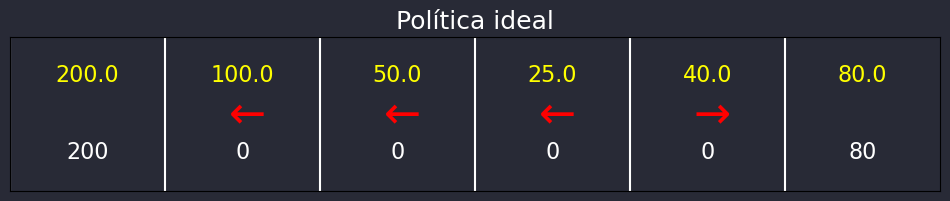

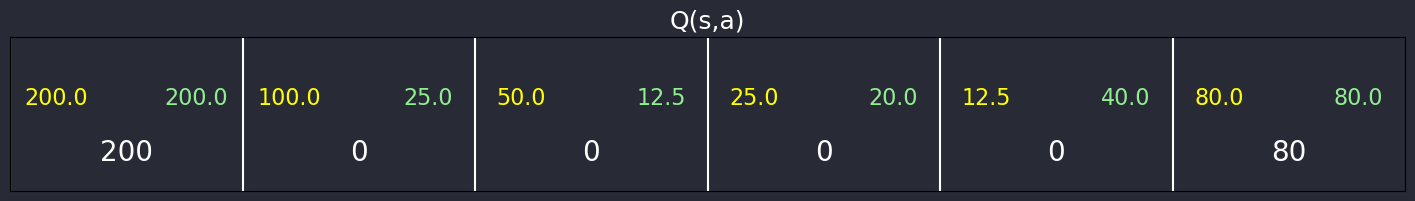

In [4]:
generate_visualization(terminal_left_reward, terminal_right_reward,
                       each_step_reward, gamma, misstep_prob)

### A função retorno é dada por

\begin{align*}
Retorno &= γ^0 \cdot R_1 + γ^1 \cdot R_2 + γ^2 \cdot R_3 + γ^3 \cdot R_4 + ...
\end{align*}

Onde:

$R_x$ é a recompensa (reward) de cada estado 

γ é o fator desconto (Gamma)




| Categoria            | Jogo de Xadrez                 | Avião Guiado  (SUSAN, exemplo)                  | Smiles de Volatilidade              |
| -------------------- | ------------------------------ | ------------------------------- | ------------------------------- |
| Estados (States)     | Posições no tabuleiro          | Parâmetros de voo (altitude, velocidade, etc.) |  |
| Ações (Actions)      | Movimentos de peças            | Controles de voo (ailerons, leme, etc.) |  |
| Recompensas (Rewards)| Pontuação da partida           | Desempenho da manobra, estabilização durante falhas, etc. |  |
| Fator de Desconto (γ)   | Geralmente próximo a 1         | Ajustável com base na tarefa específica |  |
| Retorno (Return)     | Soma das pontuações da partida | Soma das recompensas de estabilização |  |
| Política π (Policy π)| Estratégia de movimentos        | Estratégia de controle de voo   |  |
